In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('./data_train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.drop_duplicates(subset=['datetime'])
df = df.ffill()
df = df.interpolate(method='linear', limit_direction='forward')
df = df.resample('10min', on='datetime').min().reset_index()
end_time = df['datetime'].iloc[-1]

df

,datetime,telemetry_0,telemetry_1,telemetry_2,telemetry_3,telemetry_4,telemetry_5,telemetry_6,telemetry_7,telemetry_8,telemetry_9,telemetry_10,telemetry_11,telemetry_12,telemetry_13,telemetry_14,telemetry_15
0,2019-03-01 00:00:00,0.737538,0.477119,0.292816,0.633492,0.919471,0.884814,0.752977,0.391412,0.471920,0.677801,0.687535,0.498407,NaN,NaN,NaN,NaN
1,2019-03-01 00:10:00,0.742167,0.478653,0.291369,0.618222,0.919471,0.874398,0.752977,0.391412,0.471920,0.679748,0.691707,0.497295,NaN,NaN,NaN,NaN
2,2019-03-01 00:20:00,0.744193,0.478333,0.293974,0.639383,0.919471,0.876712,0.752977,0.357143,0.471920,0.681138,0.691707,0.497295,NaN,NaN,NaN,NaN
3,2019-03-01 00:30:00,0.739274,0.480319,0.294552,0.630411,0.919471,0.875844,0.752977,0.357143,0.478575,0.679748,0.680026,0.497017,NaN,NaN,NaN,NaN
4,2019-03-01 00:40:00,0.726832,0.480081,0.293105,0.639165,0.919471,0.867743,0.752977,0.392651,0.478575,0.678357,0.671682,0.496739,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,2019-10-07 19:10:00,0.712076,0.407937,0.313649,0.626759,0.919214,0.802930,0.741821,0.417011,0.454559,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31796,2019-10-07 19:20:00,0.713233,0.408109,0.310755,0.617599,0.919214,0.795407,0.742358,0.372419,0.454559,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31797,2019-10-07 19:30:00,0.733487,0.406509,0.310755,0.581368,0.919214,0.790198,0.742358,0.440958,0.447615,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31798,2019-10-07 19:40:00,0.745061,0.408321,0.311045,0.575059,0.919214,0.791935,0.742358,0.431874,0.447615,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719


In [4]:
tr = pd.read_csv('./target_train.csv')
tr['Дата'] = pd.to_datetime(tr['Дата'])
cur_time = tr['Дата'][0]
tr

,Дата,target
0,2019-03-13 17:00:00,0.123711
1,2019-03-13 21:00:00,0.319588
2,2019-03-14 01:00:00,0.255155
3,2019-03-14 05:00:00,0.319588
4,2019-03-14 09:00:00,0.159794
...,...,...
1768,2019-10-07 13:00:00,0.128866
1769,2019-10-07 15:00:00,0.170103
1770,2019-10-07 17:00:00,0.167526
1771,2019-10-07 19:00:00,0.180412


In [4]:
df = df[df['datetime'] >= cur_time]
tr = tr[tr['Дата'] <= end_time]

In [5]:
tr = tr.resample('10min', on='Дата').min()
tr = tr.interpolate(method='time').reset_index()

In [6]:
tr.rename(columns={'Дата': 'datetime'}, inplace=True)
tr

,datetime,target
0,2019-03-13 17:00:00,0.123711
1,2019-03-13 17:10:00,0.131873
2,2019-03-13 17:20:00,0.140034
3,2019-03-13 17:30:00,0.148196
4,2019-03-13 17:40:00,0.156357
...,...,...
29960,2019-10-07 18:20:00,0.176117
29961,2019-10-07 18:30:00,0.177191
29962,2019-10-07 18:40:00,0.178265
29963,2019-10-07 18:50:00,0.179338


In [7]:
df

,datetime,telemetry_0,telemetry_1,telemetry_2,telemetry_3,telemetry_4,telemetry_5,telemetry_6,telemetry_7,telemetry_8,telemetry_9,telemetry_10,telemetry_11,telemetry_12,telemetry_13,telemetry_14,telemetry_15
1830,2019-03-13 17:00:00,0.786148,0.496793,0.304679,0.617704,0.919471,0.868900,0.752977,0.432287,0.472209,0.699495,0.753452,0.648041,0.304348,0.68,0.443182,0.206587
1831,2019-03-13 17:10:00,0.787305,0.497651,0.304679,0.625573,0.919471,0.853275,0.752977,0.419488,0.470473,0.702276,0.761796,0.646928,0.304348,0.68,0.443182,0.206587
1832,2019-03-13 17:20:00,0.785569,0.501467,0.303811,0.626470,0.919471,0.850093,0.752977,0.419488,0.470473,0.705057,0.770418,0.646372,0.304348,0.68,0.443182,0.206587
1833,2019-03-13 17:30:00,0.783254,0.501791,0.302364,0.621216,0.919471,0.853854,0.752977,0.434765,0.467869,0.710620,0.784602,0.646650,0.304348,0.68,0.443182,0.206587
1834,2019-03-13 17:40:00,0.781229,0.501635,0.303233,0.623029,0.919471,0.856458,0.752333,0.432287,0.467869,0.720354,0.769583,0.645816,0.304348,0.68,0.443182,0.206587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,2019-10-07 19:10:00,0.712076,0.407937,0.313649,0.626759,0.919214,0.802930,0.741821,0.417011,0.454559,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31796,2019-10-07 19:20:00,0.713233,0.408109,0.310755,0.617599,0.919214,0.795407,0.742358,0.372419,0.454559,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31797,2019-10-07 19:30:00,0.733487,0.406509,0.310755,0.581368,0.919214,0.790198,0.742358,0.440958,0.447615,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719
31798,2019-10-07 19:40:00,0.745061,0.408321,0.311045,0.575059,0.919214,0.791935,0.742358,0.431874,0.447615,0.728682,0.728682,0.728682,0.732919,0.25,0.397727,0.640719


In [11]:
df_merged = pd.merge(tr, df, on='datetime')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      29965 non-null  datetime64[ns]
 1   target        29965 non-null  float64       
 2   telemetry_0   29965 non-null  float64       
 3   telemetry_1   29965 non-null  float64       
 4   telemetry_2   29965 non-null  float64       
 5   telemetry_3   29965 non-null  float64       
 6   telemetry_4   29965 non-null  float64       
 7   telemetry_5   29965 non-null  float64       
 8   telemetry_6   29965 non-null  float64       
 9   telemetry_7   29965 non-null  float64       
 10  telemetry_8   29965 non-null  float64       
 11  telemetry_9   29965 non-null  float64       
 12  telemetry_10  29965 non-null  float64       
 13  telemetry_11  29965 non-null  float64       
 14  telemetry_12  29965 non-null  float64       
 15  telemetry_13  29965 non-null  float6

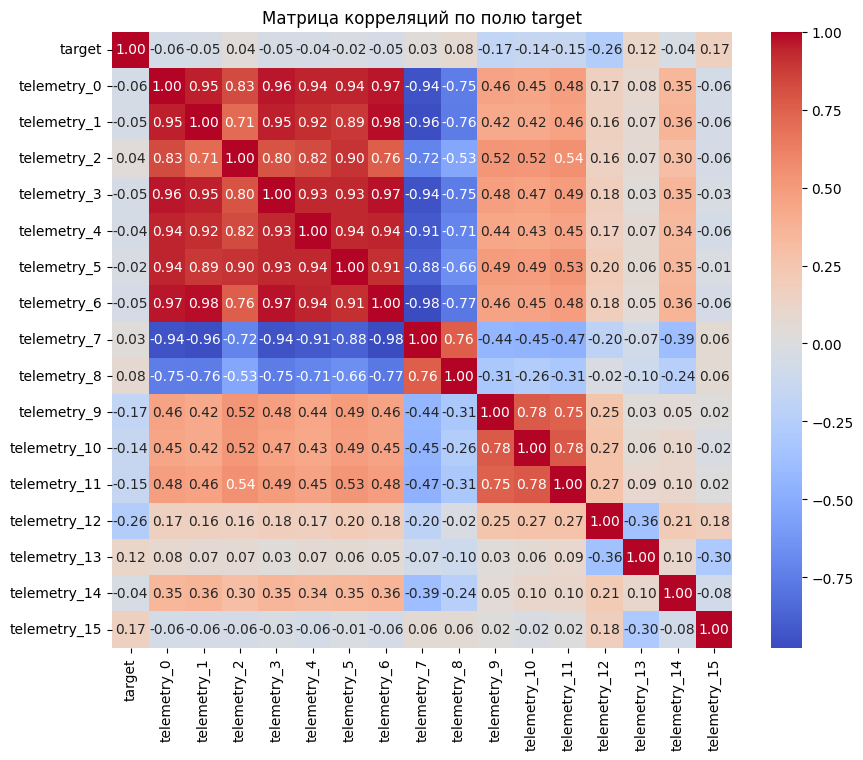

In [9]:
df_merged.drop('datetime', axis=1, inplace=True)
correlation_matrix = df_merged.corr()
target_correlation = correlation_matrix['target']
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title('Матрица корреляций по полю target')
plt.show()

In [1]:
df

NameError: name 'df' is not defined